In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [110]:
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(data["IPG2211A2N"])

test_results[1]

0.1862146911658708

In [111]:
#Here the test_results[1] showing p value(p value ~= 0 then it is Stationary if p~=1 then non stationary)

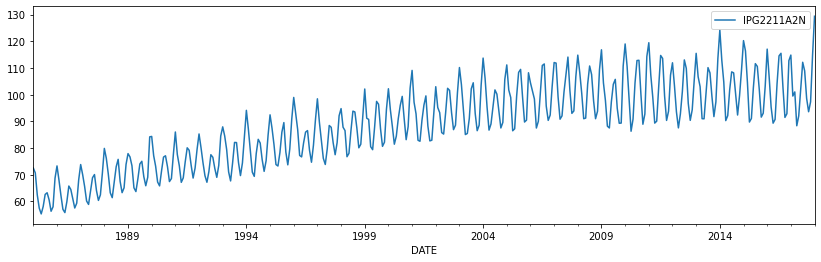

In [112]:
data.plot(figsize=(14, 4))

In [113]:
data1 = data['2016'][['IPG2211A2N']]
data1

,IPG2211A2N
DATE,
2016-01-01,117.0837
2016-02-01,106.6688
2016-03-01,95.3548
2016-04-01,89.3254
2016-05-01,90.7369
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637


In [114]:
data1.rename(columns = {'IPG2211A2N':'sales'}, inplace = True)
data1

,sales
DATE,
2016-01-01,117.0837
2016-02-01,106.6688
2016-03-01,95.3548
2016-04-01,89.3254
2016-05-01,90.7369
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637


In [115]:
#moving3average = moving average with window 3
data1['moving3average'] = data1['sales'].rolling(window = 3).mean()
data1['moving3average']

DATE
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    106.369100
2016-04-01     97.116333
2016-05-01     91.805700
2016-06-01     94.699933
2016-07-01    103.104700
2016-08-01    111.364367
2016-09-01    110.939767
2016-10-01    103.255433
2016-11-01     95.713467
2016-12-01     99.048700
Name: moving3average, dtype: float64

In [116]:
data1

,sales,moving3average
DATE,,
2016-01-01,117.0837,NaN
2016-02-01,106.6688,NaN
2016-03-01,95.3548,106.369100
2016-04-01,89.3254,97.116333
2016-05-01,90.7369,91.805700
2016-06-01,104.0375,94.699933
2016-07-01,114.5397,103.104700
2016-08-01,115.5159,111.364367
2016-09-01,102.7637,110.939767


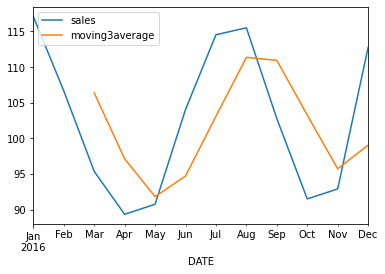

In [117]:
data1.plot()

In [118]:
#Exponential weight average
data1['ewm'] = data1['sales'].ewm(alpha = 0.3,adjust = False, min_periods = 3).mean()
data1

,sales,moving3average,ewm
DATE,,,
2016-01-01,117.0837,NaN,NaN
2016-02-01,106.6688,NaN,NaN
2016-03-01,95.3548,106.369100,108.377901
2016-04-01,89.3254,97.116333,102.662151
2016-05-01,90.7369,91.805700,99.084575
2016-06-01,104.0375,94.699933,100.570453
2016-07-01,114.5397,103.104700,104.761227
2016-08-01,115.5159,111.364367,107.987629
2016-09-01,102.7637,110.939767,106.420450


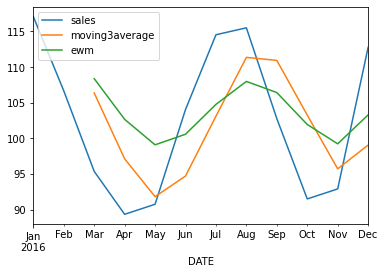

In [119]:
data1.plot()